# Project Name : Bankruptcy Prevention

##### Hari Prasath

In [1]:
# Necessary Libray
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

## Exploratory Data Analysis (EDA)


In [2]:
# Load the data
data = pd.read_excel('bankruptcy-prevention.xlsx')
data.head()

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy


In [3]:
data.shape

(250, 1)

In [4]:
# Basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 1 columns):
 #   Column                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                        --------------  ----- 
 0   industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class  250 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


In [5]:
# Descriptive statistics
data.describe()

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
count,250
unique,103
top,0;1;0;0;0;1;bankruptcy
freq,11


In [6]:
# Check for missing values
data.isnull().sum()

industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class    0
dtype: int64

In [7]:
data.duplicated().sum()

147

In [8]:
data.dtypes

industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class    object
dtype: object

In [9]:
# Inspect column names
data.columns

Index(['industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class'], dtype='object')

In [10]:
data_split = data['industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class'].str.split(';', expand=True)

In [11]:
data_split.columns = [
    'industrial_risk', 
    'management_risk', 
    'financial_flexibility', 
    'credibility', 
    'competitiveness', 
    'operating_risk', 
    'class'
]

In [12]:

data_split = data_split.apply(pd.to_numeric, errors='ignore')

In [13]:
label_encoder = LabelEncoder()
data_split['class'] = label_encoder.fit_transform(data_split['class'])

In [14]:
# Display basic information about the cleaned dataset
print(data_split.info())
print(data_split.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 12.8 KB
None
   industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5 

In [15]:
# Display summary statistics
print(data_split.describe())

       industrial_risk  management_risk  financial_flexibility  credibility  \
count       250.000000       250.000000             250.000000   250.000000   
mean          0.518000         0.614000               0.376000     0.470000   
std           0.411526         0.410705               0.401583     0.415682   
min           0.000000         0.000000               0.000000     0.000000   
25%           0.000000         0.500000               0.000000     0.000000   
50%           0.500000         0.500000               0.500000     0.500000   
75%           1.000000         1.000000               0.500000     1.000000   
max           1.000000         1.000000               1.000000     1.000000   

       competitiveness  operating_risk       class  
count       250.000000      250.000000  250.000000  
mean          0.476000        0.570000    0.572000  
std           0.440682        0.434575    0.495781  
min           0.000000        0.000000    0.000000  
25%           0.000000 

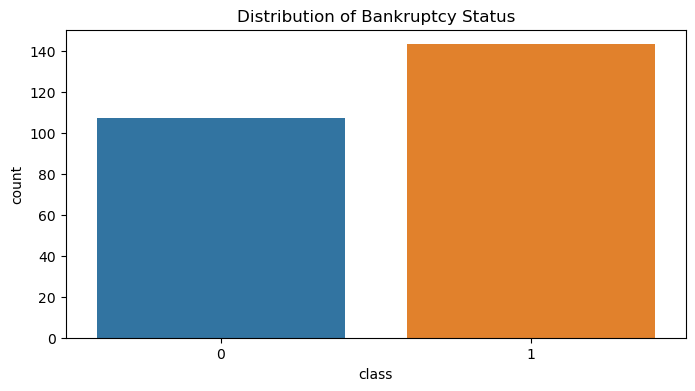

In [16]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.countplot(data=data_split, x='class')
plt.title('Distribution of Bankruptcy Status')
plt.show()

In [17]:
# Compute the correlation matrix
correlation_matrix = data_split.corr()

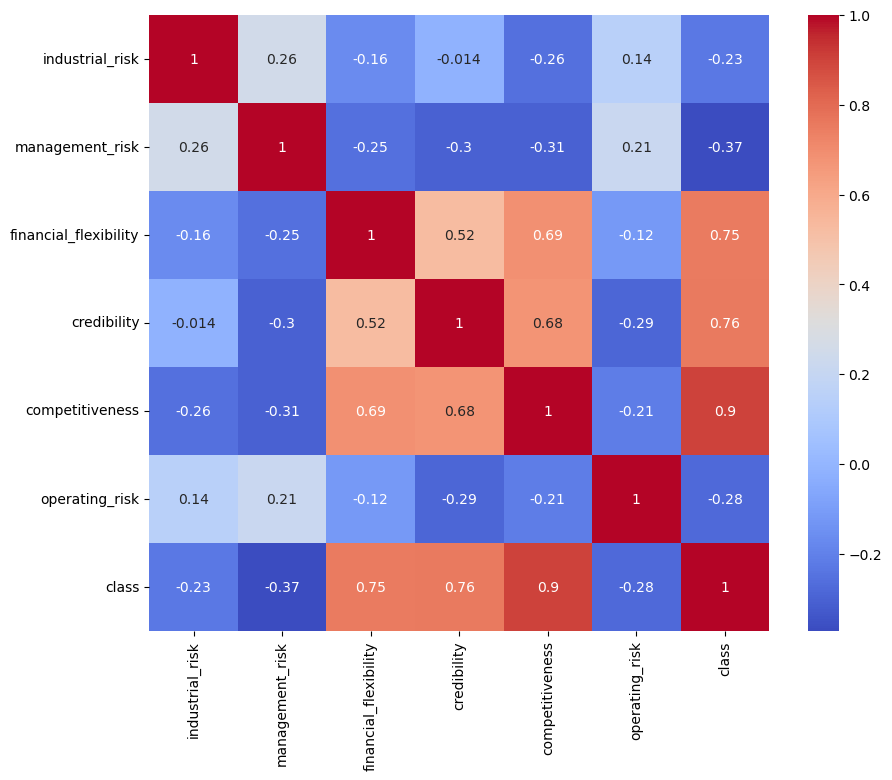

In [18]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

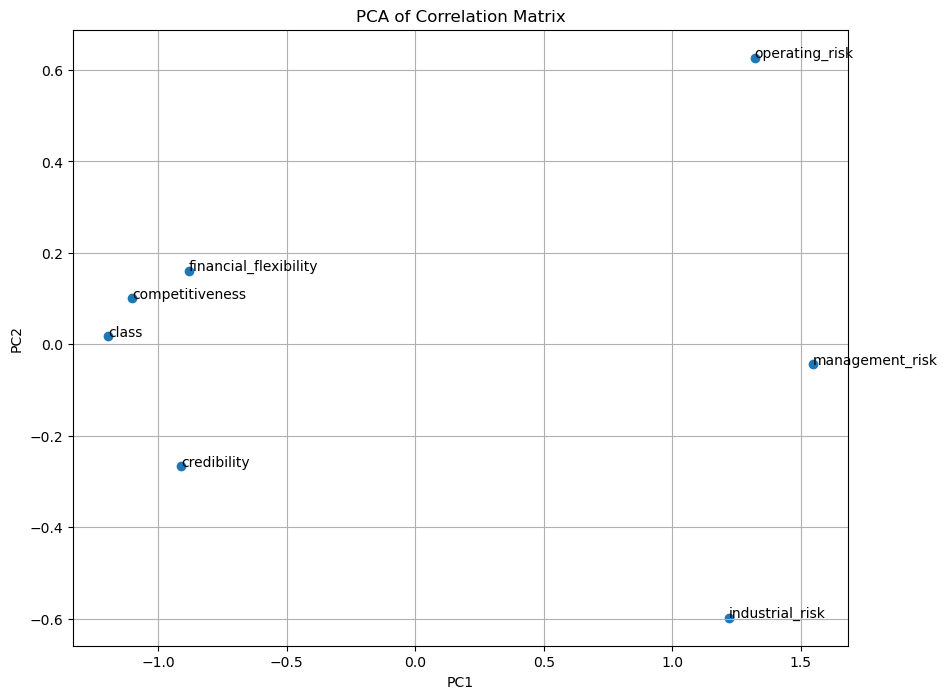

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(correlation_matrix)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Annotate each point
for i, txt in enumerate(correlation_matrix.columns):
    plt.annotate(txt, (pca_result[i, 0], pca_result[i, 1]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Correlation Matrix')
plt.grid(True)
plt.show()


## Model Building

In [20]:
# Encode the target variable
label_encoder = LabelEncoder()
data_split['class'] = label_encoder.fit_transform(data_split['class'])

In [21]:
# Split the data into features and target
X = data_split.drop('class', axis=1)
y = data_split['class']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
svc_model = SVC(random_state=42)

In [24]:
# Train the models
rf_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

SVC(random_state=42)

In [25]:
# Make predictions
rf_predictions = rf_model.predict(X_test)
svc_predictions = svc_model.predict(X_test)


In [26]:
# Evaluate the models
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Accuracy: 1.0


In [27]:
print("\nSupport Vector Classifier:")
print(classification_report(y_test, svc_predictions))
print("Accuracy:", accuracy_score(y_test, svc_predictions))


Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Accuracy: 1.0


In [28]:
# Confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix for Random Forest:\n", rf_cm)

Confusion Matrix for Random Forest:
 [[21  0]
 [ 0 29]]


In [29]:
# Confusion matrix for SVC
svc_cm = confusion_matrix(y_test, svc_predictions)
print("Confusion Matrix for SVC:\n", svc_cm)

Confusion Matrix for SVC:
 [[21  0]
 [ 0 29]]


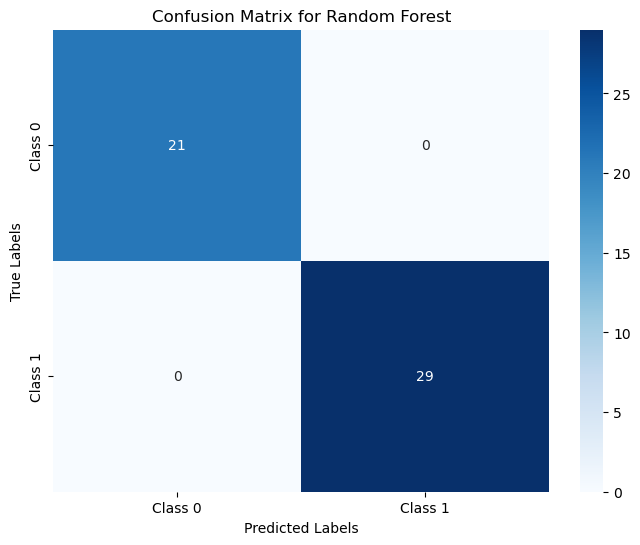

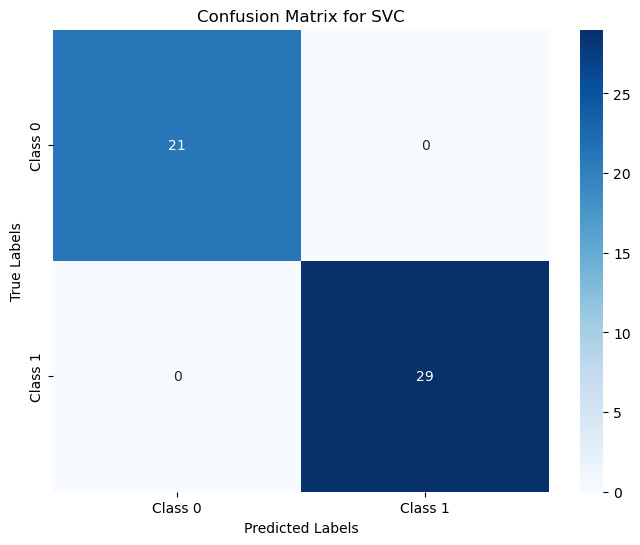

In [30]:

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1'], 
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(rf_cm, 'Random Forest')
plot_confusion_matrix(svc_cm, 'SVC')


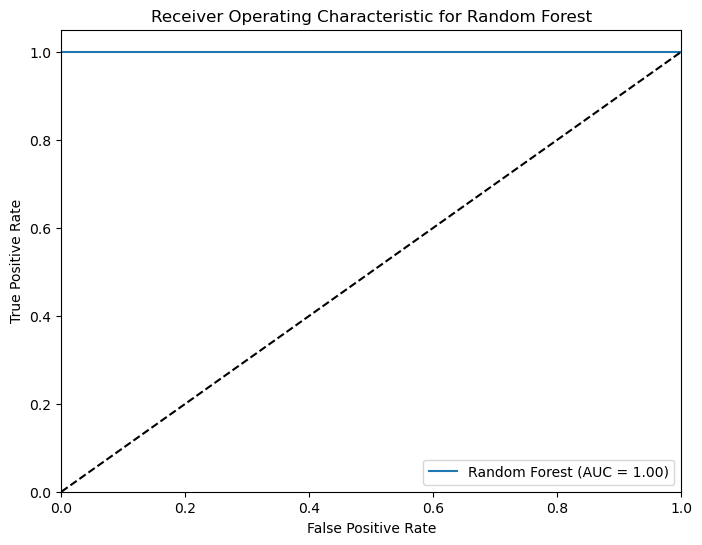

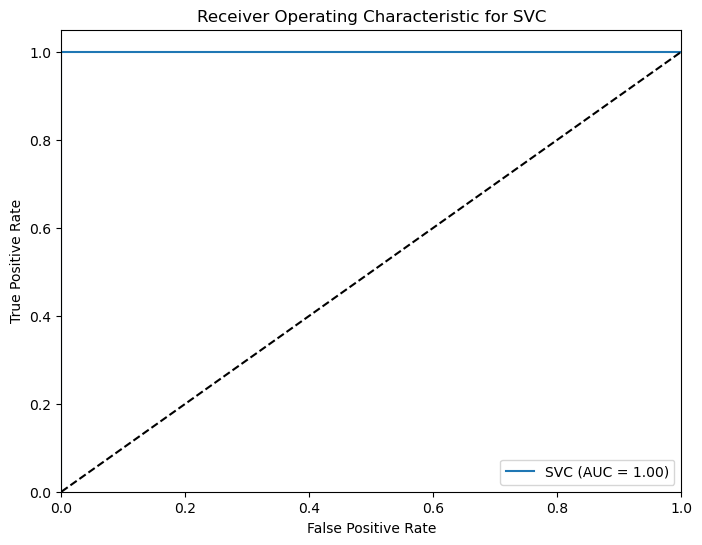

In [31]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_test, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Get probability scores
rf_probs = rf_model.predict_proba(X_test)[:, 1]
svc_probs = svc_model.decision_function(X_test) # For SVC, use decision_function

# Plot ROC curves
plot_roc_curve(y_test, rf_probs, 'Random Forest')
plot_roc_curve(y_test, svc_probs, 'SVC')


In [32]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Evaluate the models
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

print("\nSupport Vector Classifier:")
print(classification_report(y_test, svc_predictions))
print("Accuracy:", accuracy_score(y_test, svc_predictions))

# Determine the best model based on accuracy
best_model_name = 'Random Forest Classifier' if accuracy_score(y_test, rf_predictions) > accuracy_score(y_test, svc_predictions) else 'Support Vector Classifier'
best_model = rf_model if best_model_name == 'Random Forest Classifier' else svc_model

# Save the best model
model_filename = f'best_{best_model_name.lower().replace(" ", "_")}_model.pkl'
joblib.dump(best_model, model_filename)
print(f"Saved best {best_model_name} model to {model_filename}")


Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Accuracy: 1.0

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Accuracy: 1.0
Saved best Support Vector Classifier model to best_support_vector_classifier_model.pkl
